In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Loading the data set and make first column as row number
ad=pd.read_csv('advertising.csv')

In [4]:
ad

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
ad.shape

(200, 4)

## Observation- The above data is for dollars(in thousand of dollars) spent on advertising in TV, Radio and Newspaper channel.

## Sales-The sales data shows sales of single project(in thousand of items) in market

In [6]:
# Checking null values
ad.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Obersvation- There is no null values present in the given dataset.

In [7]:
# Checking data info
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## There are total 200rows and 4columns. There is no missing values and all the data in float64 data type

In [8]:
ad.shape

(200, 4)

<Axes: >

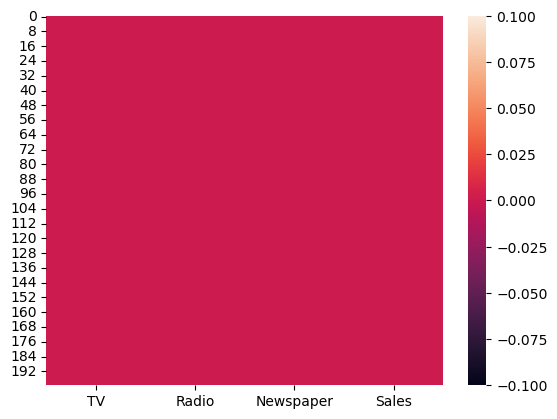

In [9]:
# Checking null values using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(ad.isnull())

In [11]:
# Checking the columns name
ad.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## Summary Statistics

In [12]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Observation- There is huge difference between 75% and maximum in column newspaper, So possibly outliers present.

## The minimum sales is 1.60 and maximum is 27

## Std is maximum in TV 

In [13]:
# Checking correlation 
# Multivariate analysis

ad_cor=ad.corr()
ad_cor

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

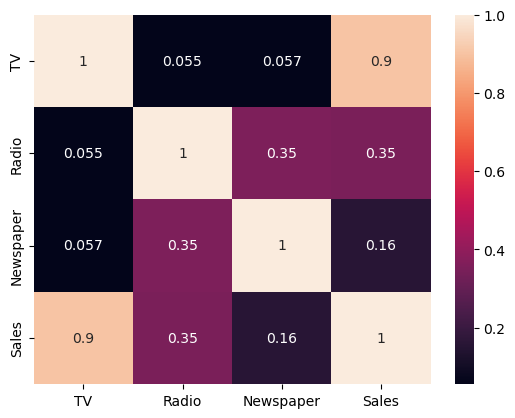

In [14]:
# Use heatmap to check correlation for better understandimg.
sns.heatmap(data=ad_cor,annot=True)

In [15]:
ad.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## Observation- We can see there is little high correlation between tv and sales, and very low correlation between newspaper and sales.

## Data Visualization

Univariate Analysis

In [17]:
#Checking total amount spent tv,radio and newspaper
print('Amount spent on radio:',ad['Radio'].sum())
print('Amount spent on newspaper:',ad['Newspaper'].sum())
print('Amount spent on sales:',ad['Sales'].sum())
print('Amount spent on TV:',ad['TV'].sum())

Amount spent on radio: 4652.800000000001
Amount spent on newspaper: 6110.799999999999
Amount spent on sales: 3026.1000000000004
Amount spent on TV: 29408.5


## observation- we can see highest amount spent on TV 

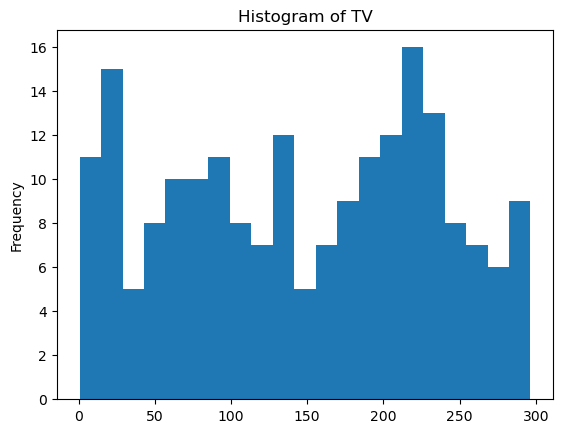

In [18]:
ad['TV'].plot.hist(bins=21)
plt.title('Histogram of TV')
plt.show()

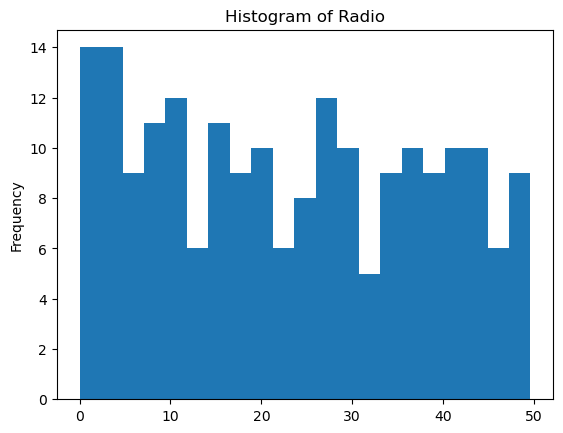

In [19]:
ad['Radio'].plot.hist(bins=21)
plt.title('Histogram of Radio')
plt.show()

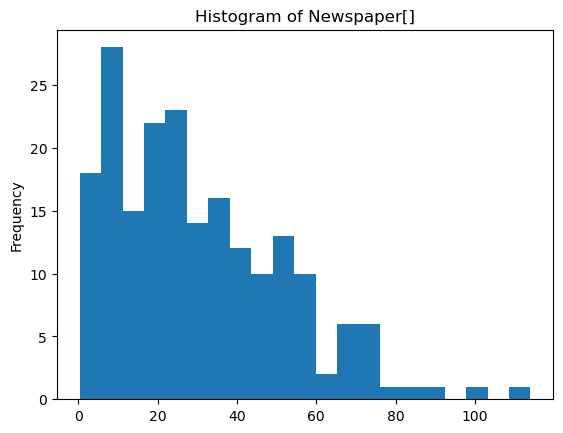

In [20]:
ad['Newspaper'].plot.hist(bins=21)
plt.title('Histogram of Newspaper[]')
plt.show()

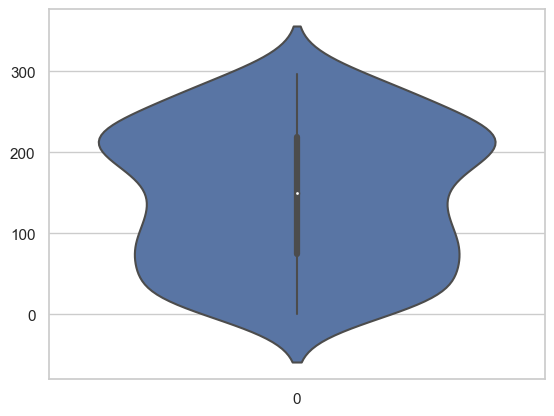

In [22]:
sns.set (style='whitegrid')
sns.violinplot(ad['TV'])
plt.show()

## observation- we can see average 180 to 240 (in thousand of dollars) spent on advertising for mot product

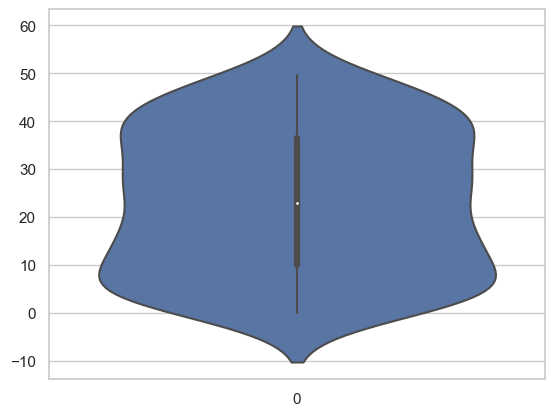

In [24]:
sns.set (style='whitegrid')
sns.violinplot(ad['Radio'])
plt.show()

## Bivariate Analysis

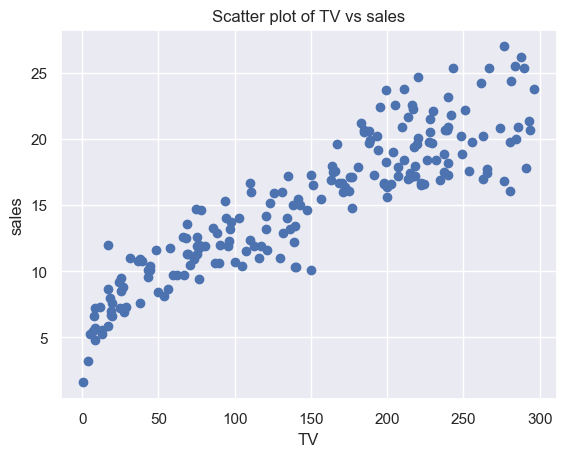

In [26]:
# Checking relationship between advertising channel and sale using scatter plot and pair plot
sns.set(style='darkgrid')
plt.scatter(ad['TV'],ad['Sales'])
plt.xlabel('TV')
plt.ylabel('sales')
plt.title('Scatter plot of TV vs sales')
plt.show()

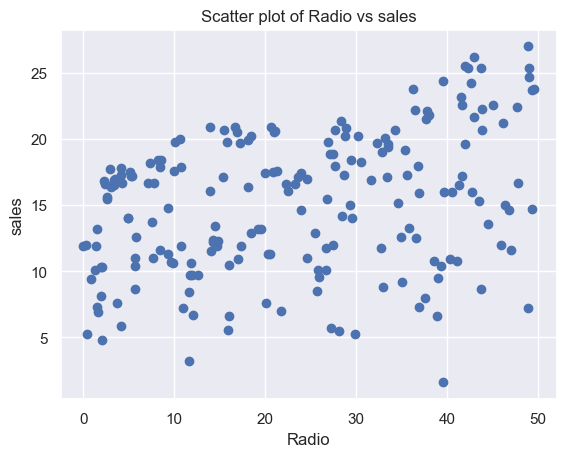

In [27]:
sns.set(style='darkgrid')
plt.scatter(ad['Radio'],ad['Sales'])
plt.xlabel('Radio')
plt.ylabel('sales')
plt.title('Scatter plot of Radio vs sales')
plt.show()

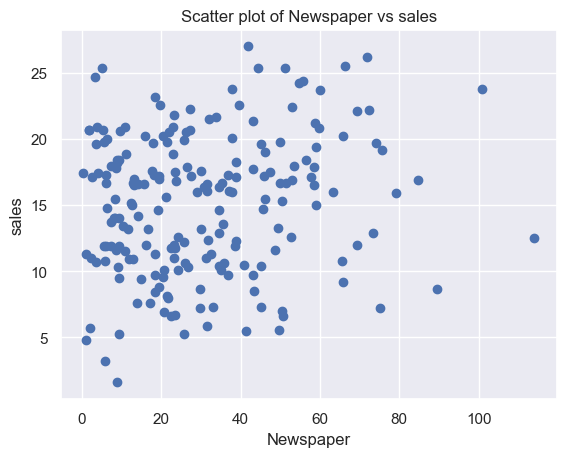

In [28]:
sns.set(style='darkgrid')
plt.scatter(ad['Newspaper'],ad['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('sales')
plt.title('Scatter plot of Newspaper vs sales')
plt.show()

## Observation- we can see there is very low relation between radio and sales, The graph shows more amount spent on radio, the sales not increase.

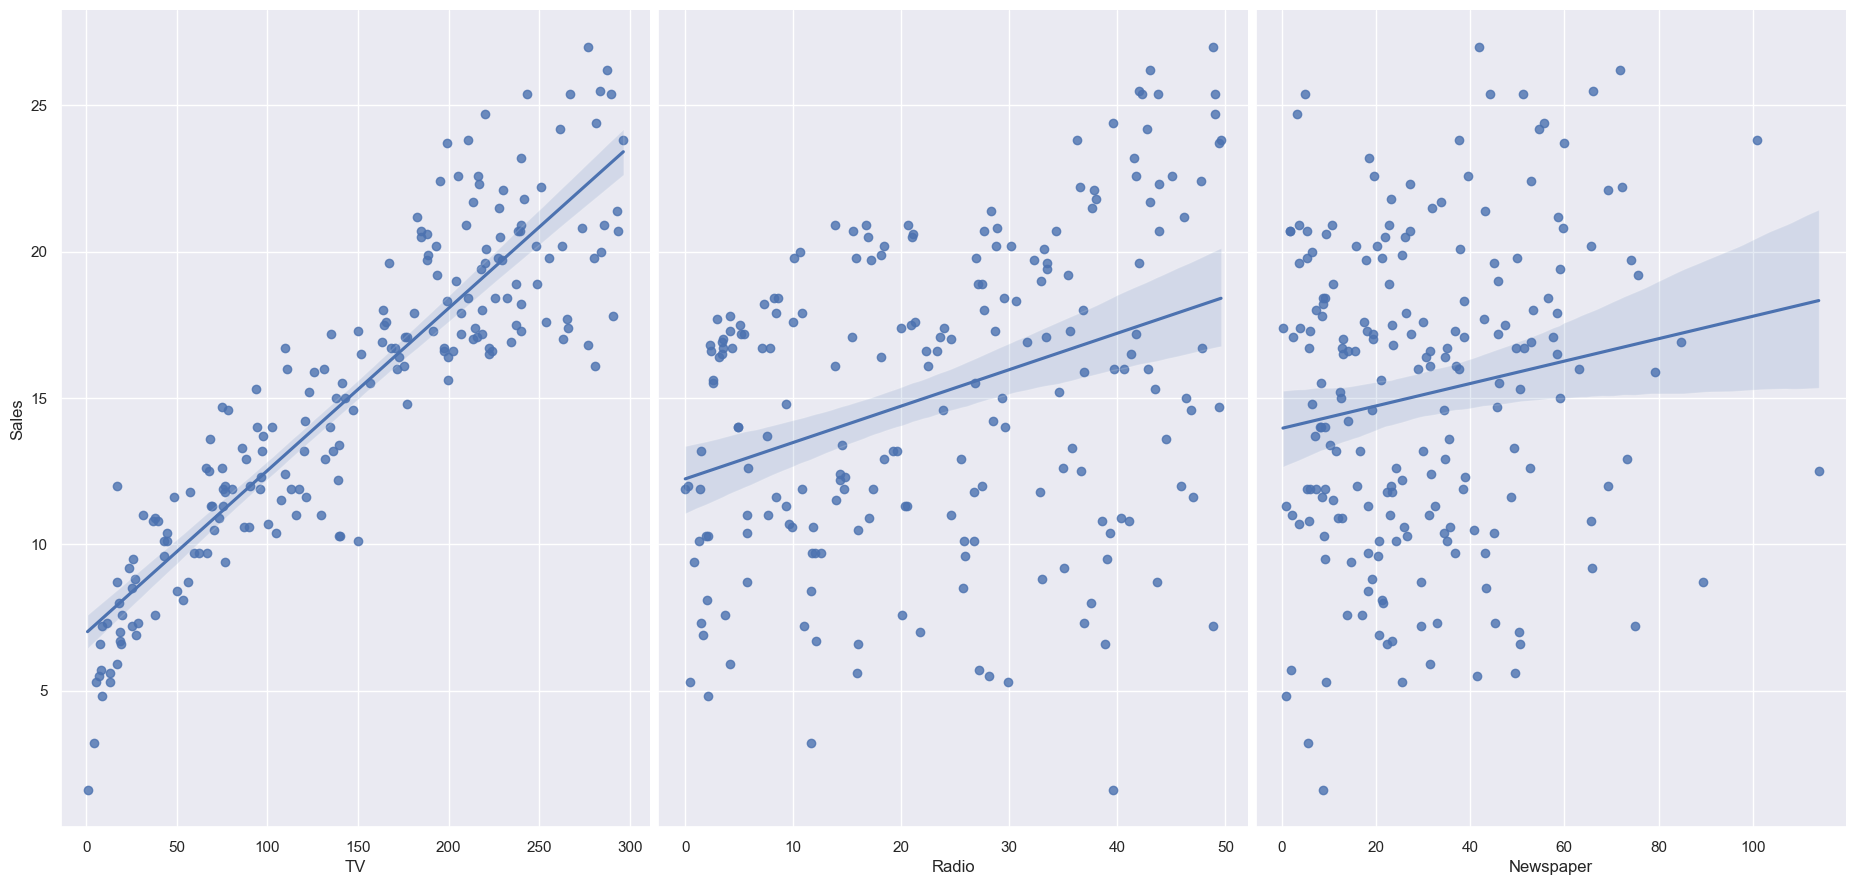

In [29]:
sns.pairplot(ad, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=9, aspect=0.7, kind='reg')

## Plotting Outliers

In [30]:
ad.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

<Axes: >

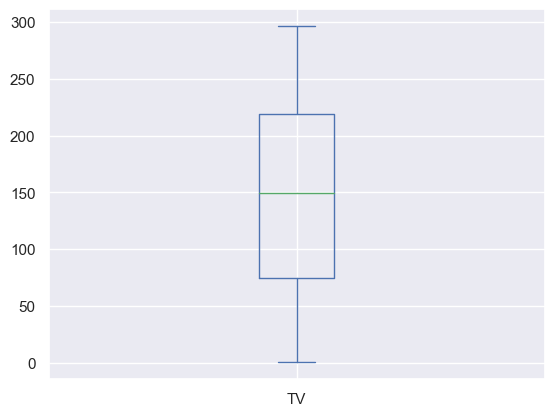

In [31]:
ad['TV'].plot.box()

<Axes: >

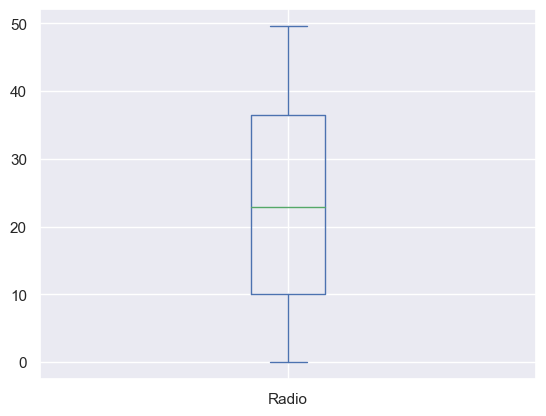

In [32]:
ad['Radio'].plot.box()

<Axes: >

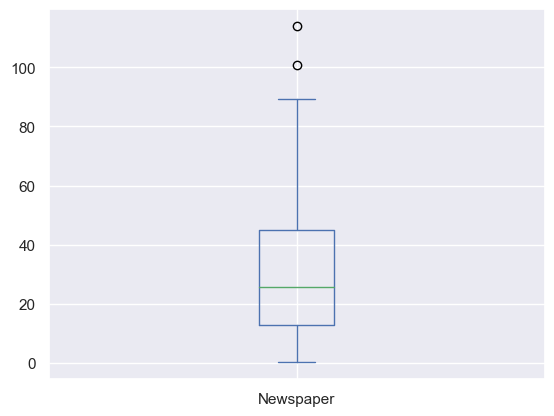

In [33]:
ad['Newspaper'].plot.box()

Observation- Possibly outliers present in newspaper column.


## Check the distribution of skewnewss

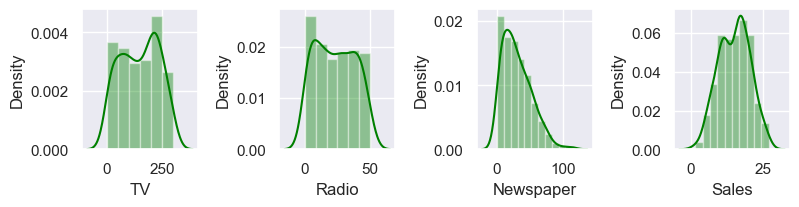

In [37]:
collist=ad.columns.values
ncol=10
nrow=5

plt.figure(figsize=(20,10))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(ad[collist[i]],color='green')
    plt.tight_layout()

In [38]:
# Checking skewness
ad.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64

In [44]:
# Treating skewness via log method

for col in ad.columns:
    if ad[col].skew()>0.55:
        ad[col]=np.log1p(ad[col])

In [46]:
# Checking the skewness again
ad.skew()

TV          -0.069853
Radio        0.094175
Newspaper   -0.799875
Sales       -0.073739
dtype: float64

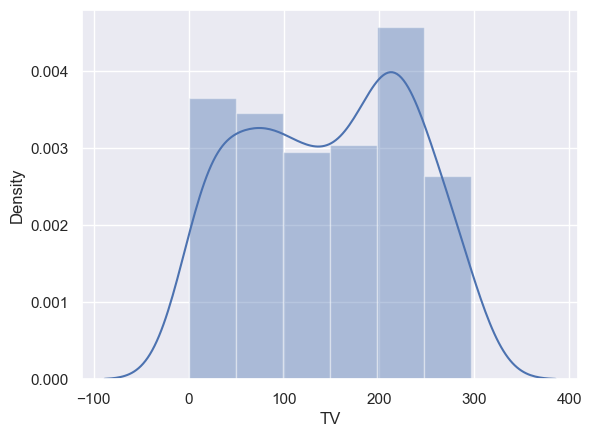

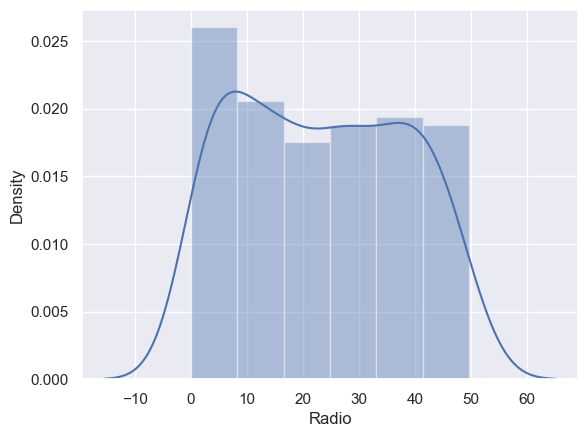

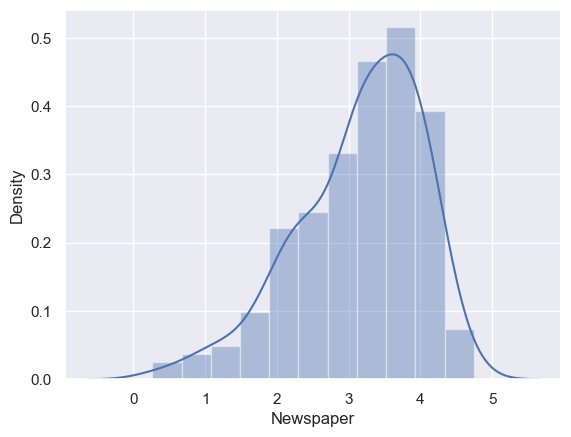

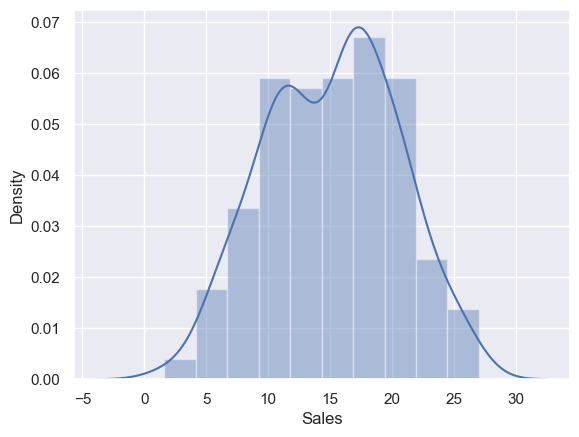

In [49]:
for i in ad.columns:
    sns.distplot(ad[i])
    plt.show()

## Removing outliers

In [50]:
from scipy.stats import zscore
z=np.abs(zscore(ad))
z

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.270548,1.322319
1,1.197376,1.082808,0.784008,0.897515
2,1.516155,1.528463,1.272195,0.593948
3,0.052050,1.217855,1.079221,0.259834
4,0.394182,0.841614,1.077274,0.525455
...,...,...,...,...
195,1.270941,1.321031,0.530505,1.428757
196,0.617035,1.240003,1.093193,0.214489
197,0.349810,0.942899,1.332444,0.062706
198,1.594565,1.265121,1.220018,1.967398


In [51]:
threshold=3
print(np.where(z>3))

(array([33], dtype=int64), array([2], dtype=int64))


In [56]:
ad_new=ad[(z<3).all(axis=1)]

In [57]:
print(ad.shape)

(200, 4)


In [58]:
print(ad_new.shape)

(199, 4)


## Observation- Now we can see one row removed from dataset due to outliers.

### From our analysis,investing in tv advertisement contributed more to our sales.
### I would advise we spend more on tv adverts and cut spending on newspaper and radio adverts